In [279]:
from torch_geometric.datasets import Planetoid
from torch_geometric.utils import degree
from collections import Counter
import matplotlib.pyplot as plt
import networkx as nx 
from torch_geometric.utils import to_networkx
import pandas as pd
import numpy as np


## Cora Dataset
Cora is a scientific paper citation network of 2708 publications, where each node is a paper and each connection is a reference. Each publication is descried as a binary vector of 1433 unique words (bag of words). The goal is to clssify the category the paper belongs to.

<img src="CoraBalloons.png" atl="cora">
<!-- <img src="cora.png" atl="cora2"> -->

## Exploring Graph Data

In [280]:
# loading cora dataset
dataset = Planetoid(root=".", name="Cora")
# access the first graph
data = dataset[0]

print(f'Dataset: {dataset}')
print(f'-------------------')
print(f'Number of graphs: {len(dataset)}')
print(f'{data}')
print(f'Number of nodes: {data.x.shape[0]}') # using shape to check dimenstion row is nodes and col is features
print(f'Number of features: {dataset.num_features}')
print(f'Number of classes: {dataset.num_classes}')

print(f'Graph:')
print(f'-------------------')
print(f'Edges are directed: {data.is_directed()}')
print(f'Graph has isolated nodes: {data.has_isolated_nodes()}')
print(f'Graph has loops: {data.has_self_loops()}')


# print(f'-------------------')
# print(f'Tensor:')
# print(f'Features of first 3 nodes (publication papers)\n {data.x[:3]}')
# print(f'First 5 edges\n {data.edge_index[:, :5]}')
# print(f'label of 5 node\n {data.y[:5]}')



Dataset: Cora()
-------------------
Number of graphs: 1
Data(x=[2708, 1433], edge_index=[2, 10556], y=[2708], train_mask=[2708], val_mask=[2708], test_mask=[2708])
Number of nodes: 2708
Number of features: 1433
Number of classes: 7
Graph:
-------------------
Edges are directed: False
Graph has isolated nodes: False
Graph has loops: False


## Inspect data as tabular data

In [281]:
df = pd.DataFrame(data.x.numpy())
df['label'] = pd.DataFrame(data.y)
df

,0,1,2,3,4,5,6,7,8,9,...,1424,1425,1426,1427,1428,1429,1430,1431,1432,label
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
4,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2703,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3
2704,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3
2705,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3
2706,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3


## Calculating node degrees

Average node degree: 3.90


,0
0,3
1,3
2,5
3,1
4,5
...,...
2703,1
2704,1
2705,1
2706,4


,count,mean,std,min,25%,50%,75%,max
0,2708.0,3.9,5.23,1.0,2.0,3.0,5.0,168.0


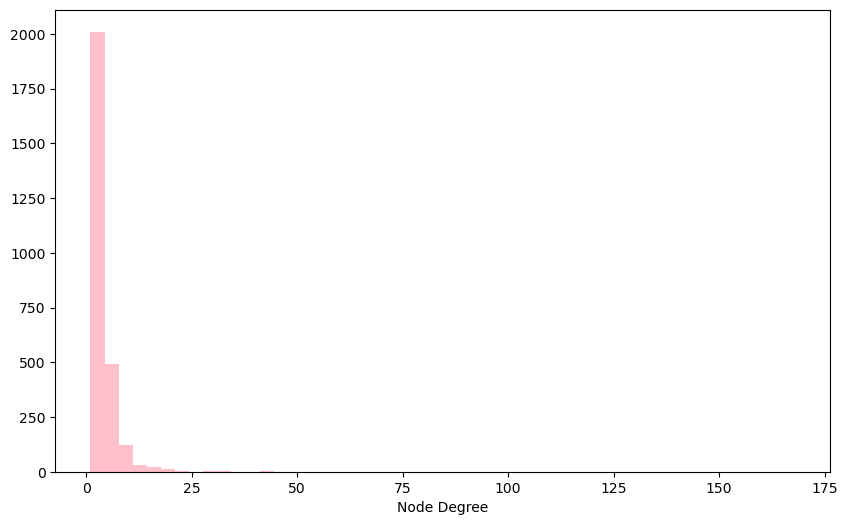

In [282]:

average_node_degree = data.num_edges / data.num_nodes
print(f"Average node degree: {average_node_degree:.2f}")


G = to_networkx(data, to_undirected=True)
degrees = []
for i, node in G.degree():
    degrees.append(node)

display(pd.DataFrame(pd.Series(degrees)))
display(pd.DataFrame(pd.Series(degrees).describe()).transpose().round(2))


plt.figure(figsize=(10, 6))
n, bins, patches = plt.hist(degrees, bins=50, color="pink")

plt.xlabel("Node Degree")
plt.show()


## Visualizing the Graph with NetworkX

tensor([[   0,  633],
        [   0, 1862],
        [   0, 2582],
        ...,
        [2707,  598],
        [2707, 1473],
        [2707, 2706]])
tensor([[   0,  633],
        [   0, 1862],
        [   0, 2582],
        ...,
        [2707,  598],
        [2707, 1473],
        [2707, 2706]])
tensor([[0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        ...,
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.]])
tensor([3, 4, 4,  ..., 3, 3, 3])


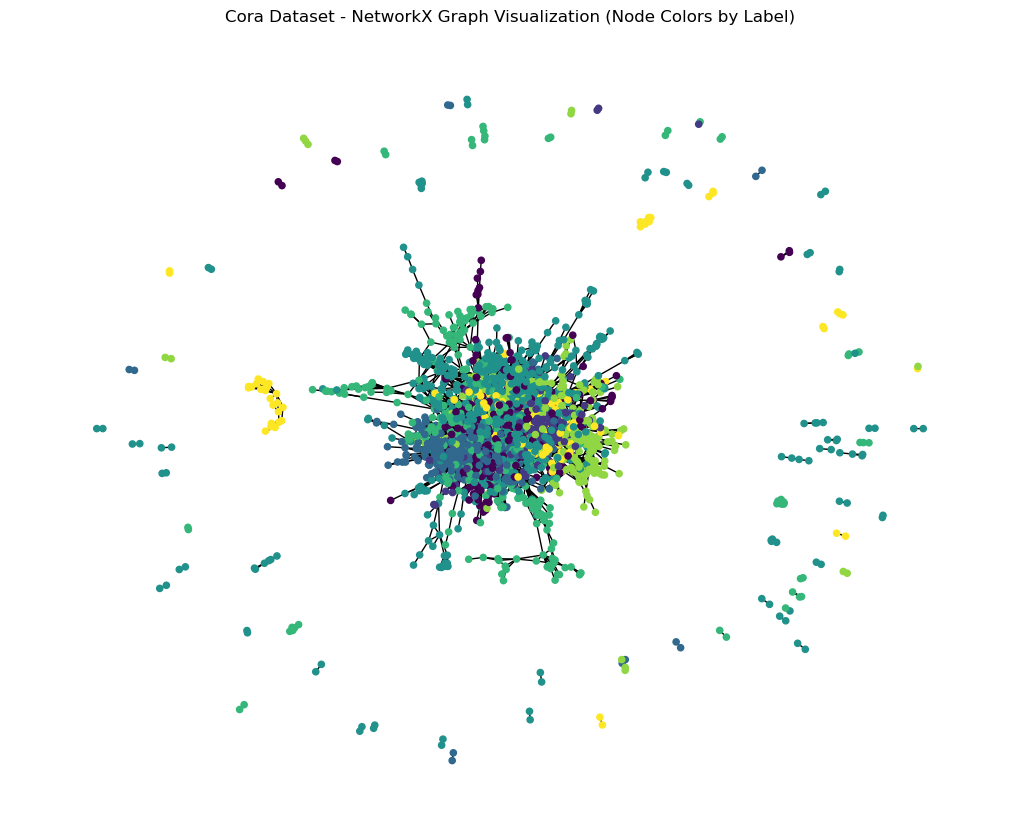

threshold 0.011821204285186553


/Users/tramle/anaconda3/lib/python3.11/site-packages/networkx/drawing/nx_pylab.py:433: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  node_collection = ax.scatter(


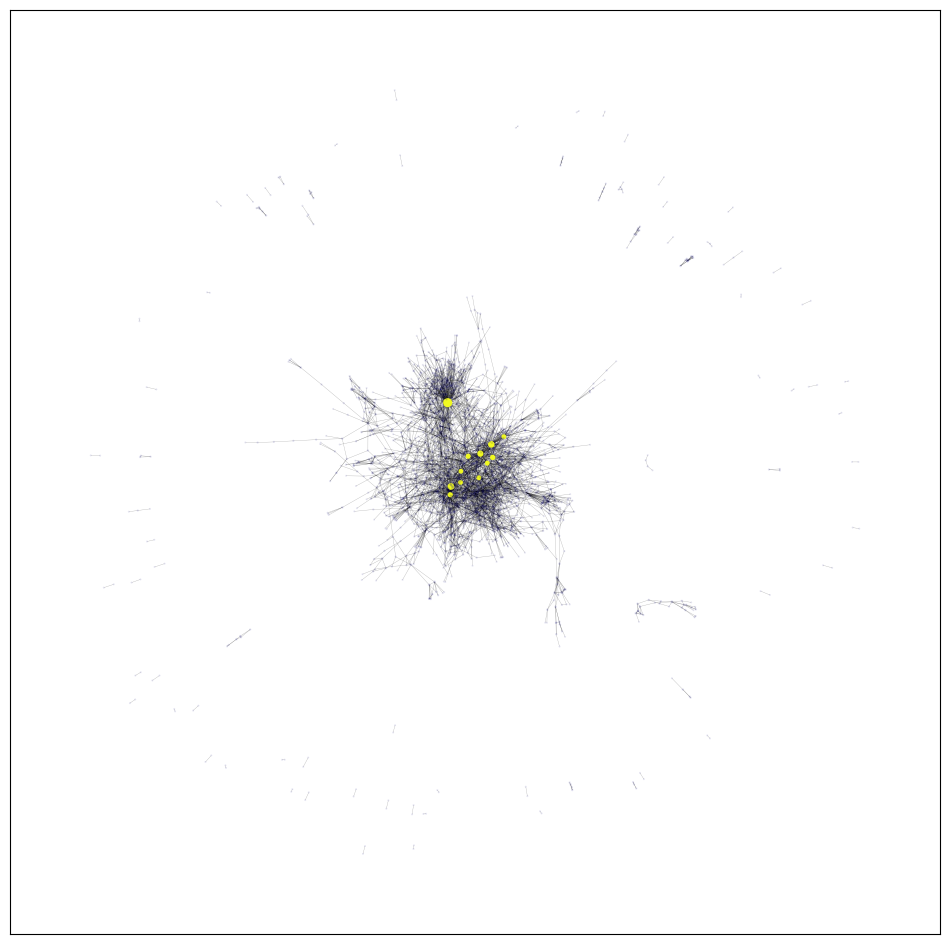

In [283]:

tranpose = data.edge_index.T
print(tranpose)

adj = data.edge_index.t()
print(adj)

features = data.x
print(features)

labels = data.y
print(labels)

plt.figure(figsize=(10, 8))
Gr = to_networkx(data, to_undirected=True)
nx.draw_spring(G, node_size=20, arrows=False, node_color=labels)
plt.title("Cora Dataset - NetworkX Graph Visualization (Node Colors by Label)")
plt.show()

G = to_networkx(data, to_undirected=True)
pos = nx.spring_layout(G, seed=42)
cent = nx.degree_centrality(G)
node_size = list(map(lambda x: x * 500, cent.values()))
cent_array = np.array(list(cent.values()))
threshold = sorted(cent_array, reverse=True)[10]
print("threshold", threshold)
cent_bin = np.where(cent_array >= threshold, 1, 0.1)
plt.figure(figsize=(12, 12))
nodes = nx.draw_networkx_nodes(G, pos, node_size=node_size,
                               cmap=plt.cm.plasma,
                               node_color=cent_bin,
                               nodelist=list(cent.keys()),
                               alpha=cent_bin)
edges = nx.draw_networkx_edges(G, pos, width=0.25, alpha=0.3)
plt.show()



## Vanila neural nets

In [284]:
import torch
from torch.nn import Linear
import torch.nn.functional as F

# Define accuracy metric as the number of correctly predicted results / total numbe of samples
def accuracy(y_pred, y_true):
    return torch.sum(y_pred == y_true) / len(y_true)

# The artificial neural netwrok without topological data
class MLP(torch.nn.Module):
    def __init__(self, dim_in, dim_h, dim_out):
        super().__init__()
        self.linear1 = Linear(dim_in, dim_h) # input layer -> hidden layer
        self.linear2 = Linear(dim_h, dim_out) # hidden layer -> output layer

    def forward(self, x):
        x = self.linear1(x)
        x = torch.relu(x)
        x = self.linear2(x)
        return F.log_softmax(x, dim=1) # Softmax layer to convert output to probability between 0 and 1
    
    # Training function
    def fit(self, data, epochs):
        criterion = torch.nn.CrossEntropyLoss() # Use cross entropy loss as loss function
        optimizer = torch.optim.Adam(self.parameters(), lr=0.01, weight_decay=5e-4) # Use Adam optimizer

        # main training loop
        self.train() # Set the model in tranining mode
        for epoch in range(epochs+1):
            optimizer.zero_grad() # Clear the gradients
            out = self(data.x)
            loss = criterion(out[data.train_mask], data.y[data.train_mask]) # calculate the loss between output and ground truth
            acc = accuracy(out[data.train_mask].argmax(dim=1), data.y[data.train_mask])
            loss.backward() # Back propogate the loss
            optimizer.step() # Gradient descent

            # Print the stats every 20 epochs
            if epoch % 20 == 0:
                val_loss = criterion(out[data.val_mask], data.y[data.val_mask])
                val_acc = accuracy(out[data.val_mask].argmax(dim=1), data.y[data.val_mask])
                print(f'Epoch {epoch:>3} | Train Loss: {loss:.3f} | Train Acc: {acc*100:>5.2f}% | Val Loss: {val_loss:.2f} | Val Acc: {val_acc*100:.2f}%')

    def test(self, data):
        self.eval()
        out = self(data.x)
        acc = accuracy(out.argmax(dim=1)[data.test_mask], data.y[data.test_mask])
        return acc

In [285]:
mlp = MLP(dataset.num_features, 16, dataset.num_classes)
print(mlp)

MLP(
  (linear1): Linear(in_features=1433, out_features=16, bias=True)
  (linear2): Linear(in_features=16, out_features=7, bias=True)
)


In [286]:
mlp.fit(data, epochs=100)

Epoch   0 | Train Loss: 1.945 | Train Acc: 15.00% | Val Loss: 1.92 | Val Acc: 33.00%
Epoch  20 | Train Loss: 0.308 | Train Acc: 99.29% | Val Loss: 2.08 | Val Acc: 42.40%
Epoch  40 | Train Loss: 0.056 | Train Acc: 100.00% | Val Loss: 1.89 | Val Acc: 43.60%
Epoch  60 | Train Loss: 0.008 | Train Acc: 100.00% | Val Loss: 1.36 | Val Acc: 56.60%
Epoch  80 | Train Loss: 0.007 | Train Acc: 100.00% | Val Loss: 1.43 | Val Acc: 52.40%
Epoch 100 | Train Loss: 0.008 | Train Acc: 100.00% | Val Loss: 1.46 | Val Acc: 52.20%


In [287]:
acc = mlp.test(data)
print(f'MLP test accuracy: {acc*100:.2f}%')

MLP test accuracy: 51.90%


## Graph Neural Network

In [288]:
# Define the layer of GNN
class VanillaGNNLayer(torch.nn.Module):
    def __init__(self, dim_in, dim_out):
        super().__init__()
        self.linear = Linear(dim_in, dim_out, bias=False)

    def forward(self, x, adjacency):
        x = self.linear(x)
        x = torch.sparse.mm(adjacency, x) # Matrix multiplication on ajacency matrix to accumulate the value of neighbor nodes
        return x

In [289]:
from torch_geometric.utils import to_dense_adj

adjacency = to_dense_adj(data.edge_index)[0]
adjacency += torch.eye(len(adjacency))
adjacency

tensor([[1., 0., 0.,  ..., 0., 0., 0.],
        [0., 1., 1.,  ..., 0., 0., 0.],
        [0., 1., 1.,  ..., 0., 0., 0.],
        ...,
        [0., 0., 0.,  ..., 1., 0., 0.],
        [0., 0., 0.,  ..., 0., 1., 1.],
        [0., 0., 0.,  ..., 0., 1., 1.]])

In [290]:
class VanillaGNN(torch.nn.Module):
    def __init__(self, dim_in, dim_h, dim_out):
        super().__init__()
        self.gnn1 = VanillaGNNLayer(dim_in, dim_h) # Use our customized layer for forwarding the data
        self.gnn2 = VanillaGNNLayer(dim_h, dim_out)

    def forward(self, x, adjacency):
        h = self.gnn1(x, adjacency)
        h = torch.relu(h)
        h = self.gnn2(h, adjacency)
        return F.log_softmax(h, dim=1)

    def fit(self, data, epochs):
        criterion = torch.nn.CrossEntropyLoss()
        optimizer = torch.optim.Adam(self.parameters(), lr=0.01, weight_decay=5e-4)
        self.train()
        for epoch in range(epochs+1):
            optimizer.zero_grad()
            out = self(data.x, adjacency)
            loss = criterion(out[data.train_mask], data.y[data.train_mask])
            acc = accuracy(out[data.train_mask].argmax(dim=1), data.y[data.train_mask])
            loss.backward()
            optimizer.step()
            if epoch % 20 == 0:
                val_loss = criterion(out[data.val_mask], data.y[data.val_mask])
                val_acc = accuracy(out[data.val_mask].argmax(dim=1), data.y[data.val_mask])
                print(f'Epoch {epoch:>3} | Train Loss: {loss:.3f} | Train Acc: {acc*100:>5.2f}% | Val Loss: {val_loss:.2f} | Val Acc: {val_acc*100:.2f}%')
                
    def test(self, data):
        self.eval()
        out = self(data.x, adjacency)
        acc = accuracy(out.argmax(dim=1)[data.test_mask], data.y[data.test_mask])
        return acc

In [291]:
gnn = VanillaGNN(dataset.num_features, 16, dataset.num_classes)
print(gnn)
gnn.fit(data, epochs=100)
acc = gnn.test(data)
print(f'\nGNN test accuracy: {acc*100:.2f}%')

VanillaGNN(
  (gnn1): VanillaGNNLayer(
    (linear): Linear(in_features=1433, out_features=16, bias=False)
  )
  (gnn2): VanillaGNNLayer(
    (linear): Linear(in_features=16, out_features=7, bias=False)
  )
)
Epoch   0 | Train Loss: 2.444 | Train Acc: 15.00% | Val Loss: 2.26 | Val Acc: 14.80%
Epoch  20 | Train Loss: 0.124 | Train Acc: 100.00% | Val Loss: 1.44 | Val Acc: 75.20%
Epoch  40 | Train Loss: 0.020 | Train Acc: 100.00% | Val Loss: 2.18 | Val Acc: 73.40%
Epoch  60 | Train Loss: 0.005 | Train Acc: 100.00% | Val Loss: 2.36 | Val Acc: 74.00%
Epoch  80 | Train Loss: 0.003 | Train Acc: 100.00% | Val Loss: 2.51 | Val Acc: 73.60%
Epoch 100 | Train Loss: 0.003 | Train Acc: 100.00% | Val Loss: 2.48 | Val Acc: 74.20%

GNN test accuracy: 74.60%


## Graph Convolutional Neural Network (GCN)

In [292]:
import torch
import torch.nn.functional as F
from torch_geometric.nn import GCNConv

def accuracy(pred_y, y):
    return ((pred_y == y).sum() / len(y)).item()

class GCN(torch.nn.Module):
    """Graph Convolutional Network"""
    def __init__(self, dim_in, dim_h, dim_out):
        super().__init__()
        self.gcn1 = GCNConv(dim_in, dim_h) # Use the GCNConv layer from torch_geometric library
        self.gcn2 = GCNConv(dim_h, dim_out)

    def forward(self, x, edge_index):
        h = self.gcn1(x, edge_index)
        h = torch.relu(h)
        h = self.gcn2(h, edge_index)
        return F.log_softmax(h, dim=1)
    
    def fit(self, data, epochs):
        criterion = torch.nn.CrossEntropyLoss()
        optimizer = torch.optim.Adam(self.parameters(),
                                    lr=0.01,
                                    weight_decay=5e-4)
        self.train()
        for epoch in range(epochs+1):
            optimizer.zero_grad()
            out = self(data.x, data.edge_index)
            loss = criterion(out[data.train_mask], data.y[data.train_mask])
            acc = accuracy(out[data.train_mask].argmax(dim=1), data.y[data.train_mask])
            loss.backward()
            optimizer.step()
            if(epoch % 20 == 0):
                val_loss = criterion(out[data.val_mask], data.y[data.val_mask])
                val_acc = accuracy(out[data.val_mask].argmax(dim=1), data.y[data.val_mask])
                print(f'Epoch {epoch:>3} | Train Loss: {loss:.3f} | Train Acc: {acc*100:>5.2f}% | Val Loss: {val_loss:.2f} | Val Acc: {val_acc*100:.2f}%')

    @torch.no_grad()
    def test(self, data):
        self.eval()
        out = self(data.x, data.edge_index)
        acc = accuracy(out.argmax(dim=1)[data.test_mask], data.y[data.test_mask])
        return acc

In [293]:
gcn = GCN(dataset.num_features, 16, dataset.num_classes)
print(gcn)
gcn.fit(data, epochs=100)

GCN(
  (gcn1): GCNConv(1433, 16)
  (gcn2): GCNConv(16, 7)
)
Epoch   0 | Train Loss: 1.956 | Train Acc: 15.00% | Val Loss: 1.95 | Val Acc: 12.60%
Epoch  20 | Train Loss: 0.135 | Train Acc: 100.00% | Val Loss: 0.79 | Val Acc: 78.00%
Epoch  40 | Train Loss: 0.016 | Train Acc: 100.00% | Val Loss: 0.75 | Val Acc: 76.60%
Epoch  60 | Train Loss: 0.015 | Train Acc: 100.00% | Val Loss: 0.73 | Val Acc: 77.60%
Epoch  80 | Train Loss: 0.018 | Train Acc: 100.00% | Val Loss: 0.72 | Val Acc: 77.40%
Epoch 100 | Train Loss: 0.017 | Train Acc: 100.00% | Val Loss: 0.72 | Val Acc: 77.40%


In [294]:
acc = gcn.test(data)
print(f'GCN test accuracy: {acc*100:.2f}%')

GCN test accuracy: 80.60%
